In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
start = date(2014, 1, 1)
end = date.today()

In [3]:
portfolio = ["AAPL","MSFT","GE","BAC", "VZ"]
data = pd.DataFrame()
for co in portfolio:
    data[co] = web.DataReader(co, 'google', start, end)["Close"]

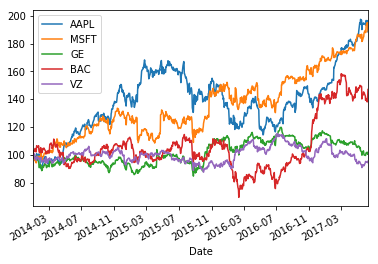

In [4]:
(data/data.ix[0] * 100).plot()
plt.show()

In [5]:
#Calculating returns
returns = np.log(data/data.shift(1))
returns.tail()

,AAPL,MSFT,GE,BAC,VZ
Date,,,,,
2017-06-05,-0.009826,0.007220,0.003580,-0.001783,-0.001508
2017-06-06,0.003372,0.003315,-0.001789,-0.008065,0.001508
2017-06-07,0.005939,-0.001794,-0.008991,0.016507,0.001291
2017-06-08,-0.002449,-0.006097,-0.003257,0.016239,-0.006689
2017-06-09,-0.039549,-0.022915,0.012606,0.030019,0.011409


In [6]:
#Mean-variance of returns
#Since we have significant differences in performance, 
#we have to use 252 trading days to annualize the daily returns 
returns.mean() * 252

AAPL    0.184735
MSFT    0.185817
GE      0.004624
BAC     0.112275
VZ     -0.013881
dtype: float64

In [7]:
#Building covariance matrix
returns.cov() * 252

,AAPL,MSFT,GE,BAC,VZ
AAPL,0.053796,0.022564,0.014462,0.019811,0.009391
MSFT,0.022564,0.050269,0.017160,0.023319,0.013268
GE,0.014462,0.017160,0.031203,0.023514,0.010685
BAC,0.019811,0.023319,0.023514,0.070008,0.009502
VZ,0.009391,0.013268,0.010685,0.009502,0.024296


In [8]:
#We assume that we do not open short position and we divide our money equally divided among 5 stocks
#So we generate 5 random numbers and then normalize them so that values would sum up 100% net oper assets
noa = len(portfolio)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.23339442,  0.30690153,  0.09958826,  0.04051551,  0.31960029])

In [9]:
#Calculating Expected portfolio return based on the weights
expected_return = np.sum(returns.mean() * weights) * 252
expected_return

0.10071658696644717

In [10]:
#Now lets calculate Expected portfolio variance using our covariance matrix
#we use np.dot -  gets us a product of two matrices
expected_variance = np.dot(weights.T, np.dot(returns.cov() * 252, weights))
expected_variance

0.021599451870846831

In [11]:
#Now we calculate expected standard deviation or volatility 
volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))) 
volatility

0.14696751978191247

In [12]:
#Monte Carlo simulation to generate random portfolio weight vectors on larger scale
#For every simulated allocation we record the resulting portfolio return and variance
#We assume Risk free is 0
mrets = []
mvols = []
for i in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    mrets.append(np.sum(returns.mean() * weights) * 252)
    mvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights ))))

mrets = np.array(mrets)
mvols = np.array(mvols)

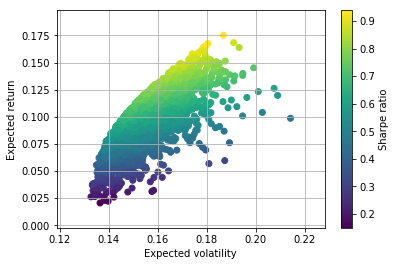

In [13]:
#Lets plot it
plt.figure()
plt.scatter(mvols, mrets, c=mrets / mvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label="Sharpe ratio")
plt.show()